In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def Get_weighted_average(value,error):
    Factor=2841.438
    sum_mean = 0
    sum_sigma = 0
    #print(value,error)
    for i in range(len(value)):
        #print(i,value[i],error[i])
        sum_mean += Factor*value[i]/(Factor**2*error[i]*error[i])
        sum_sigma += 1/(Factor**2*error[i]*error[i])
    return sum_mean/sum_sigma,math.sqrt(1/sum_sigma)
def Get_weighted_average_phi(value,error):
    sum_mean = 0
    sum_sigma = 0
    #print(value,error)
    for i in range(len(value)):
        #print(i,value[i],error[i])
        sum_mean += value[i]/(error[i]*error[i])
        sum_sigma += 1/(error[i]*error[i])
    return sum_mean/sum_sigma,math.sqrt(1/sum_sigma)
def Get_average(value1,error1,value2,error2):
    sum_mean = value1/error1**2+value2/error2**2
    sum_sigma = 1/error1**2+1/error2**2
    return sum_mean/sum_sigma,math.sqrt(1/sum_sigma)
#def Get_ratio_error(value1,error1,value2,error2):
#    return value1/value2,(value1/value2)*math.sqrt((error1/value1)**2+(error2/value2)**2)
#this is actually same method
def Get_ratio_error(value1,error1,valuem,errorm):
    return abs(value1-valuem)/valuem,abs(value1-valuem)/valuem*math.sqrt((error1/value1)**2+(errorm/valuem)**2)

In [3]:
#This one is wrong, forgot to change kt and pt in python code
#df_xs_kT8_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/simenhancedNpip_kT=0.804GeV.dat',delim_whitespace=True)
#df_xs_kT4_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/simenhancedNpip_kT=0.404GeV.dat',delim_whitespace=True)
#For -kT2+-pT2
#df_xs_kT8_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/CS_minus_kT2_minus_pT2.dat',delim_whitespace=True)
#df_xs_kT4_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/CS_minus_kT2_plus_pT2.dat',delim_whitespace=True)
#For +kT2+-pT2
#df_xs_kT8_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/CS_plus_kT2_minus_pT2.dat',delim_whitespace=True)
#df_xs_kT4_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/CS_plus_kT2_plus_pT2.dat',delim_whitespace=True)
#For +-kT2+pT2
#df_xs_kT8_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/CS_plus_kT2_plus_pT2.dat',delim_whitespace=True)
#df_xs_kT4_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/CS_minus_kT2_plus_pT2.dat',delim_whitespace=True)
#For +-kT2-pT2
df_xs_kT8_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/CS_plus_kT2_minus_pT2.dat',delim_whitespace=True)
df_xs_kT4_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/CS_minus_kT2_minus_pT2.dat',delim_whitespace=True)
#For different model 1:Bacchetta2011 2:Barone2015 see xuefei's thesis
#df_xs_kT8_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/CS_kT2_pT2_mod_2011.dat',delim_whitespace=True)
#df_xs_kT4_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/CS_kT2_pT2_mod_2015.dat',delim_whitespace=True)

df_xs_kT8_zQ2xbjPhT.head()
df_xs_kT4_zQ2xbjPhT.head()

,i,Ebeam,x,phih,y,z,Q2,pT,obs,value,stat,systrel,systabs,target,hadron,Experiment,error
0,0,11.0,0.131895,-2.556326,0.501864,0.323192,1.346218,0.071252,FUUT,0.206015,0.000315,0.0,0.0,neutron,pi+,solid,0.000315
1,1,11.0,0.185625,-2.430526,0.386240,0.324100,1.479289,0.059069,FUUT,0.189248,0.002012,0.0,0.0,neutron,pi+,solid,0.002012
2,2,11.0,0.143838,-1.734754,0.470776,0.323369,1.382172,0.068988,FUUT,0.202398,0.000768,0.0,0.0,neutron,pi+,solid,0.000768
3,3,11.0,0.150129,-1.423609,0.455720,0.323488,1.400361,0.066983,FUUT,0.200565,0.000895,0.0,0.0,neutron,pi+,solid,0.000895
4,4,11.0,0.157286,-1.111142,0.439788,0.324008,1.418788,0.063206,FUUT,0.198117,0.001089,0.0,0.0,neutron,pi+,solid,0.001089


In [4]:
#df_xs_kT6_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/simenhanced_1xs.dat',delim_whitespace=True)
df_xs_kT6_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/CS_default.dat',delim_whitespace=True)
df_xs_kT6_zQ2xbjPhT.head()

,i,Ebeam,x,phih,y,z,Q2,pT,obs,value,stat,systrel,systabs,target,hadron,Experiment,error
0,0,11.0,0.133059,-2.553460,0.499351,0.323164,1.348916,0.070915,FUUT,0.182415,0.000332,0.0,0.0,neutron,pi+,solid,0.000332
1,1,11.0,0.144092,-1.735452,0.470312,0.323313,1.383334,0.068996,FUUT,0.179541,0.000814,0.0,0.0,neutron,pi+,solid,0.000814
2,2,11.0,0.150224,-1.422743,0.455402,0.323555,1.400092,0.067013,FUUT,0.177967,0.000950,0.0,0.0,neutron,pi+,solid,0.000950
3,3,11.0,0.157111,-1.110744,0.440049,0.324098,1.418109,0.063081,FUUT,0.175768,0.001162,0.0,0.0,neutron,pi+,solid,0.001162
4,4,11.0,0.163067,-0.797371,0.427793,0.324549,1.432013,0.057253,FUUT,0.174067,0.001451,0.0,0.0,neutron,pi+,solid,0.001451


In [5]:
PI = math.pi
print(PI)
z_cuts=[0.3,0.4,0.5,0.6]
#z_cuts=[0.3,0.35,0.4,0.45]
#Q2_cuts=[1,2,3,4,5]
Q2_cuts=[1,1.5,2,2.5,3]
xbj_cuts=[0,0.7]
PhT_cuts = [0,0.4]
#PhT_cuts = [0.2,0.4]
#PhT_cuts=[0.2,0.6]
#PhT_cuts=[0.2,0.4]
#phih_bins = [-3.14,-2.5,-2,-1.5,-1,-0.5,0,0.5,1,1.5,2,2.5,3.14]
phih_bins =[-PI,-4*PI/5,-3*PI/5,-2*PI/5,-PI/5,PI/5,2*PI/5,3*PI/5,4*PI/5,PI]
#phih_bins =[-PI,-0.9*PI,-0.8*PI,-0.7*PI,-0.6*PI,-0.5*PI,-0.4*PI,-0.3*PI,-0.2*PI,-0.1*PI,0,0.1*PI,0.2*PI,0.3*PI,0.4*PI,0.5*PI,0.6*PI,0.7*PI,0.8*PI,0.9*PI,PI]
df_xs_kT8_zQ2=df_xs_kT8_zQ2xbjPhT[(df_xs_kT8_zQ2xbjPhT['x']>xbj_cuts[0])&(df_xs_kT8_zQ2xbjPhT['x']<xbj_cuts[1])&(df_xs_kT8_zQ2xbjPhT['pT']>PhT_cuts[0])&(df_xs_kT8_zQ2xbjPhT['pT']<PhT_cuts[1])]
df_xs_kT4_zQ2=df_xs_kT4_zQ2xbjPhT[(df_xs_kT4_zQ2xbjPhT['x']>xbj_cuts[0])&(df_xs_kT4_zQ2xbjPhT['x']<xbj_cuts[1])&(df_xs_kT4_zQ2xbjPhT['pT']>PhT_cuts[0])&(df_xs_kT4_zQ2xbjPhT['pT']<PhT_cuts[1])]
df_xs_kT6_zQ2=df_xs_kT6_zQ2xbjPhT[(df_xs_kT6_zQ2xbjPhT['x']>xbj_cuts[0])&(df_xs_kT6_zQ2xbjPhT['x']<xbj_cuts[1])&(df_xs_kT6_zQ2xbjPhT['pT']>PhT_cuts[0])&(df_xs_kT6_zQ2xbjPhT['pT']<PhT_cuts[1])]

3.141592653589793


352 369
326 336
297 315
255 255
288 292
280 285
272 275
260 262
271 274
270 276
265 267
261 261


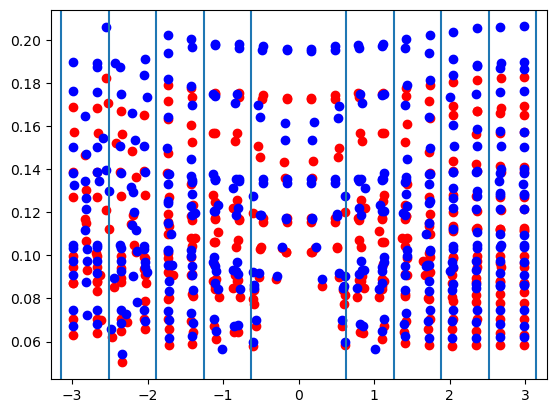

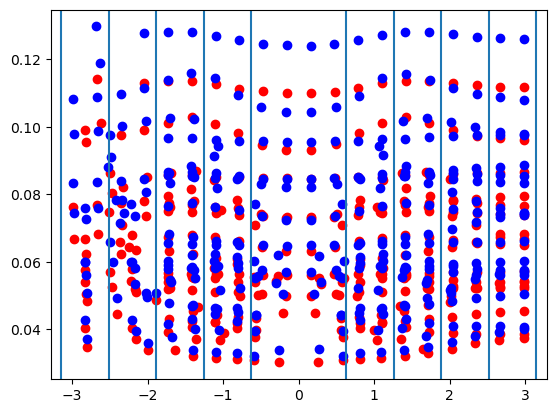

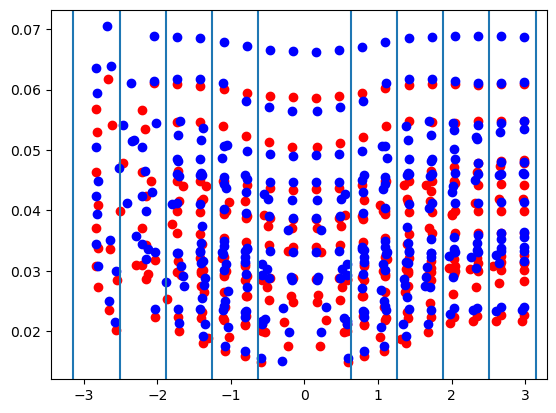

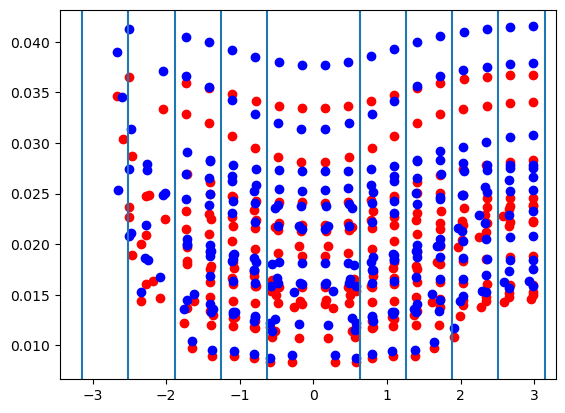

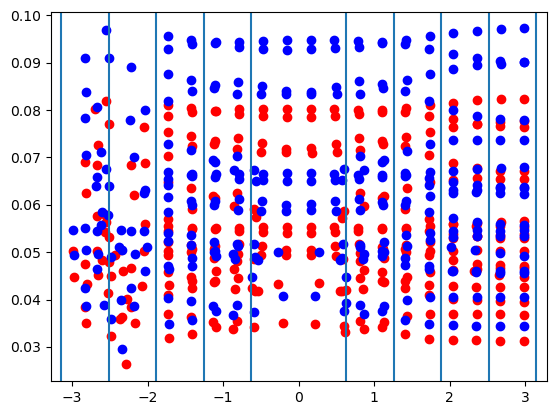

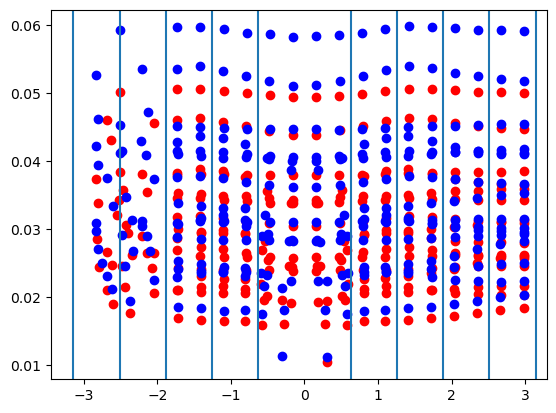

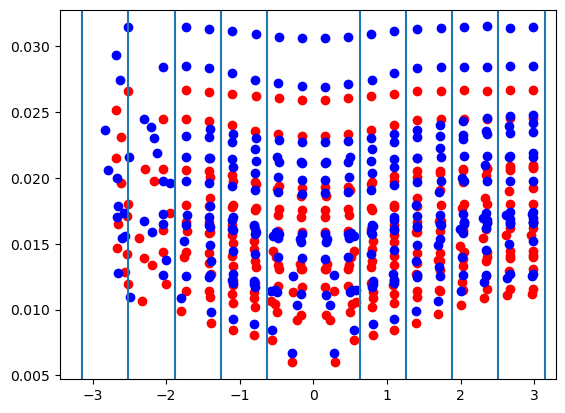

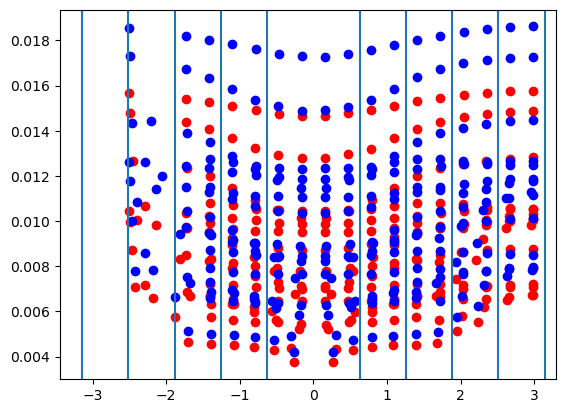

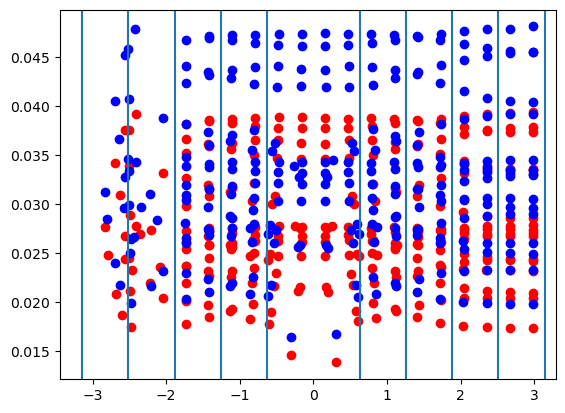

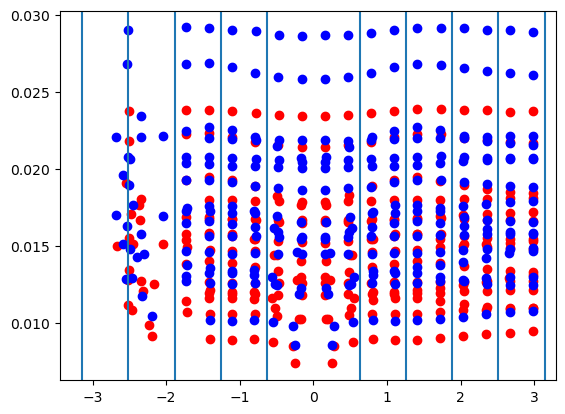

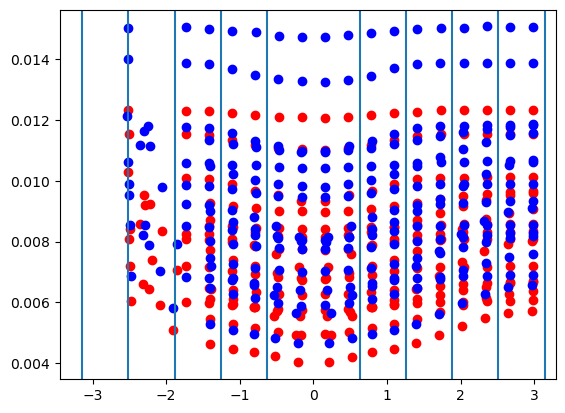

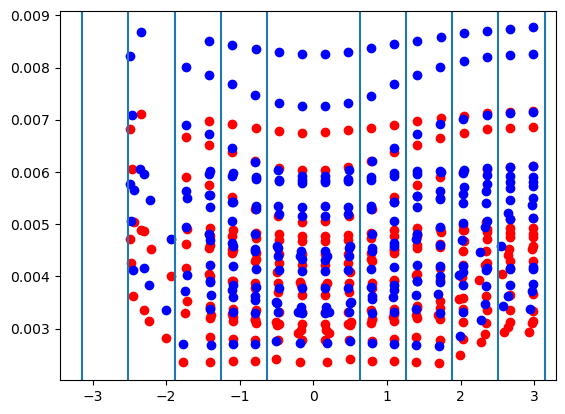

In [6]:

for i_z in range(1,len(z_cuts)):
    for i_Q2 in range(1,len(Q2_cuts)):
        df_xs_kT8=df_xs_kT8_zQ2[(df_xs_kT8_zQ2['z']>z_cuts[i_z-1])&(df_xs_kT8_zQ2['z']<z_cuts[i_z])&(df_xs_kT8_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_xs_kT8_zQ2['Q2']<Q2_cuts[i_Q2])]
        df_xs_kT4=df_xs_kT4_zQ2[(df_xs_kT4_zQ2['z']>z_cuts[i_z-1])&(df_xs_kT4_zQ2['z']<z_cuts[i_z])&(df_xs_kT4_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_xs_kT4_zQ2['Q2']<Q2_cuts[i_Q2])]
        fig = plt.figure()
        ax = fig.add_subplot()
        phih_kT8 = df_xs_kT8['phih'].to_list()
        Fuu_kT8 = df_xs_kT8['value'].to_list()
        phih_kT4 = df_xs_kT4['phih'].to_list()
        Fuu_kT4 = df_xs_kT4['value'].to_list()
        print(len(phih_kT8),len(phih_kT4))
        plt.plot(phih_kT8,np.asarray(Fuu_kT8),'ro')
        plt.plot(phih_kT4,np.asarray(Fuu_kT4),'bo')
        #for i_phi in np.asarray(phihs):
        #    print(i_phi)
        for i_phih in phih_bins:
            plt.axvline(x=i_phih)

rows,cols,row_phi 3 4 9
{}
352 369
-3.141592653589793 -2.5132741228718345
33
z,Q2,phi 0 0 0
-2.5132741228718345 -1.8849555921538759
33
z,Q2,phi 0 0 1
-1.8849555921538759 -1.2566370614359172
40
z,Q2,phi 0 0 2
-1.2566370614359172 -0.6283185307179586
36
z,Q2,phi 0 0 3
-0.6283185307179586 0.6283185307179586
50
z,Q2,phi 0 0 4
0.6283185307179586 1.2566370614359172
36
z,Q2,phi 0 0 5
1.2566370614359172 1.8849555921538759
41
z,Q2,phi 0 0 6
1.8849555921538759 2.5132741228718345
41
z,Q2,phi 0 0 7
2.5132741228718345 3.141592653589793
42
z,Q2,phi 0 0 8
326 336
-3.141592653589793 -2.5132741228718345
17
z,Q2,phi 0 1 0
-2.5132741228718345 -1.8849555921538759
27
z,Q2,phi 0 1 1
-1.8849555921538759 -1.2566370614359172
39
z,Q2,phi 0 1 2
-1.2566370614359172 -0.6283185307179586
38
z,Q2,phi 0 1 3
-0.6283185307179586 0.6283185307179586
56
z,Q2,phi 0 1 4
0.6283185307179586 1.2566370614359172
38
z,Q2,phi 0 1 5
1.2566370614359172 1.8849555921538759
41
z,Q2,phi 0 1 6
1.8849555921538759 2.5132741228718345
36
z,Q2,

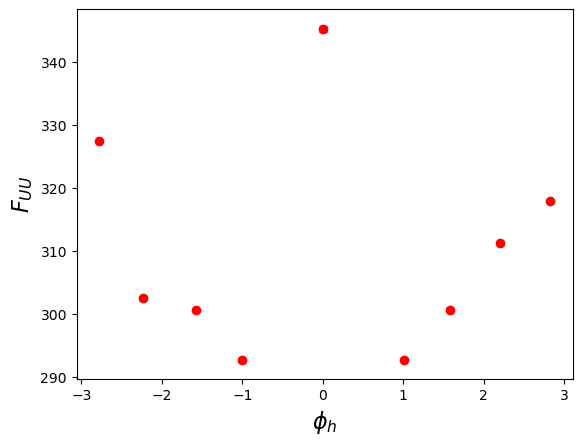

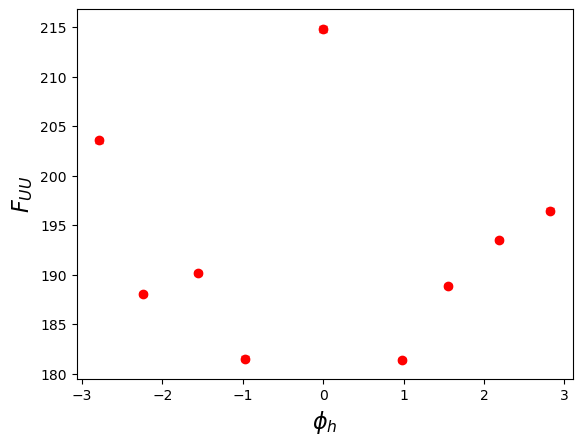

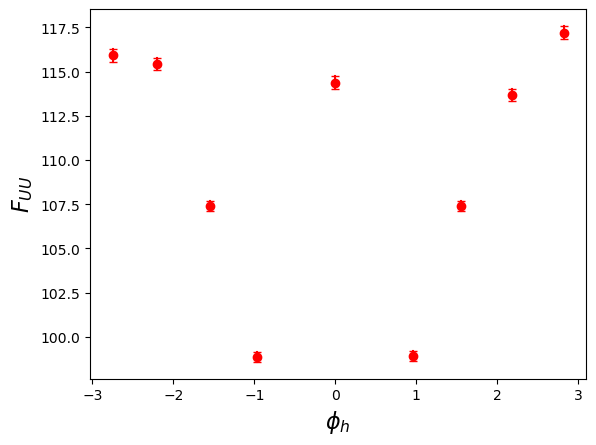

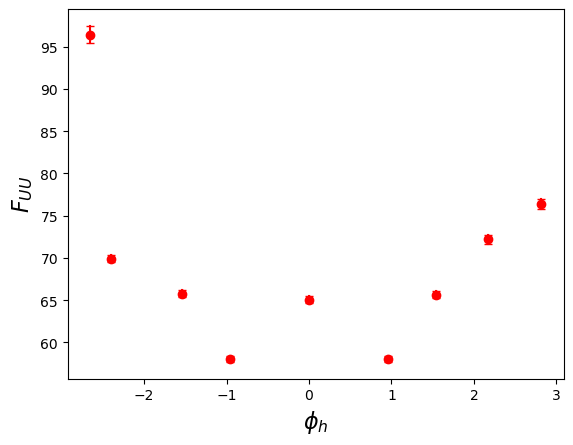

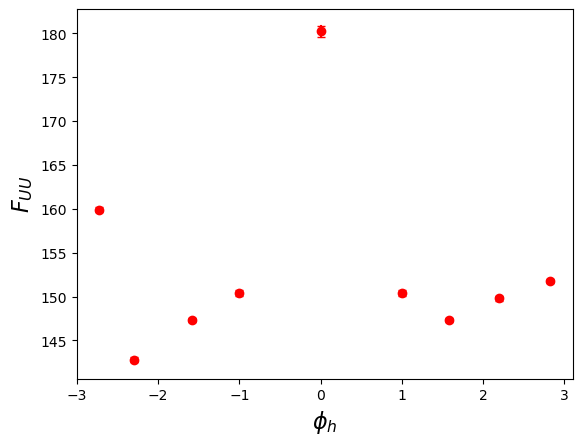

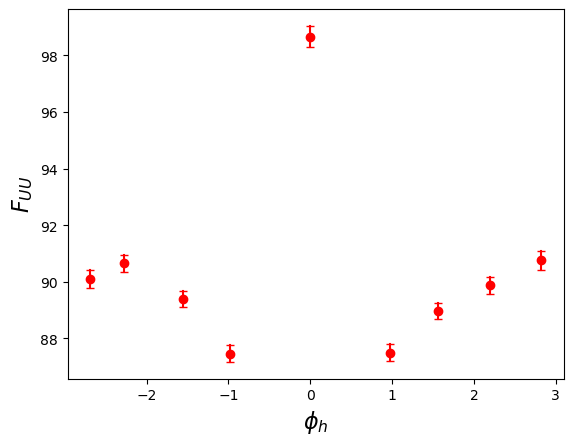

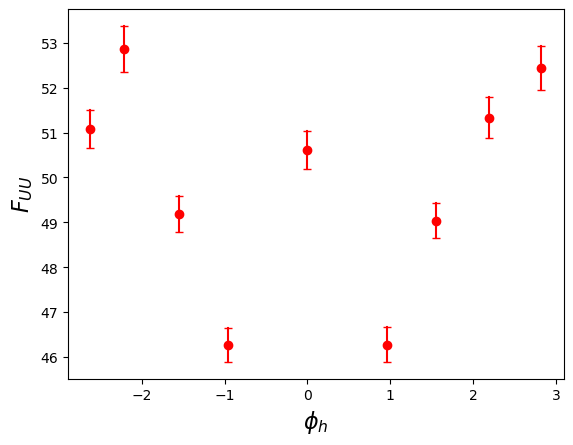

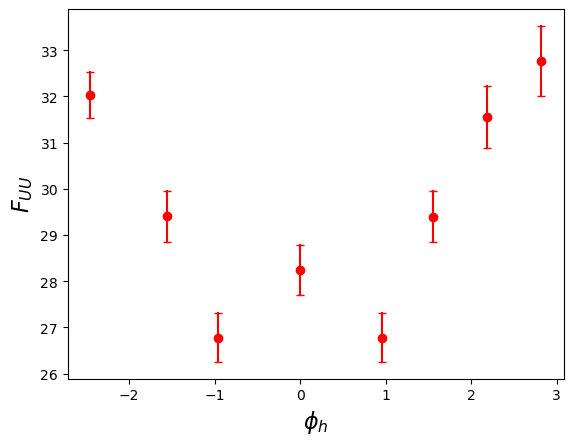

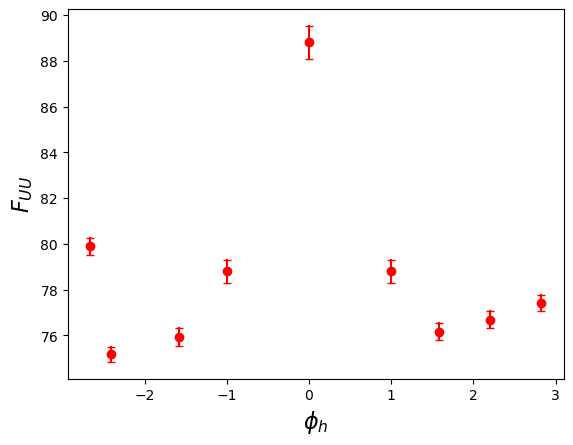

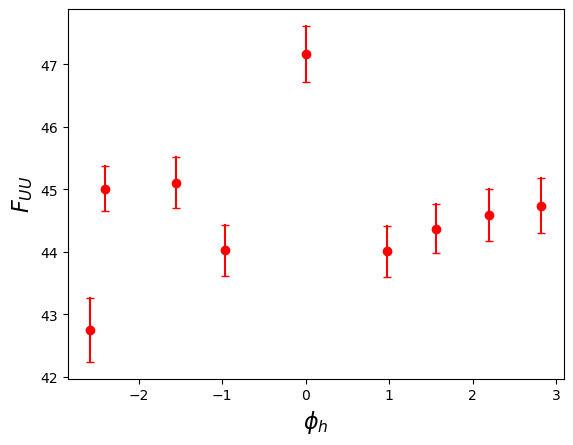

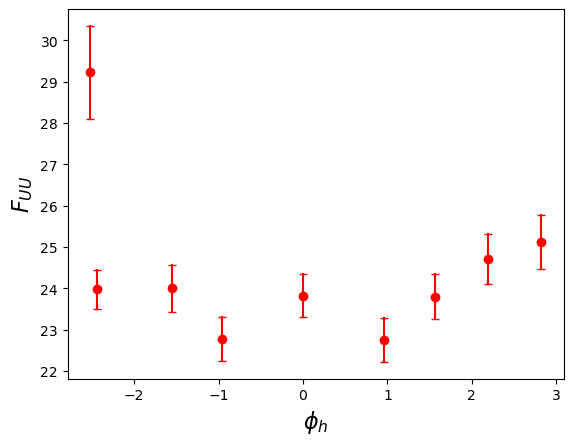

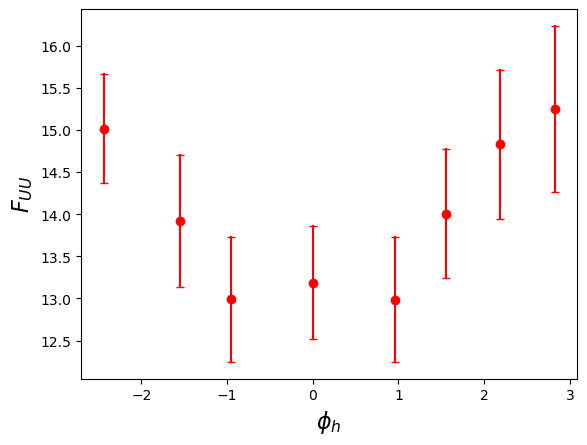

In [7]:
import pprint
rows = len(z_cuts)-1
cols = len(Q2_cuts)-1
row_phi = len(phih_bins)-1

phihs_kT8={}
Fuus_kT8 = {}#[[[0]*rows]*cols]*row_phi
Fuus_err_kT8 = {}#[[[0]*rows]*cols]*row_phi
print('rows,cols,row_phi',rows,cols,row_phi)
pprint.pprint(phihs_kT8)
for i_z in range(1,len(z_cuts)):
    for i_Q2 in range(1,len(Q2_cuts)):
        df_xs_kT8=df_xs_kT8_zQ2[(df_xs_kT8_zQ2['z']>z_cuts[i_z-1])&(df_xs_kT8_zQ2['z']<z_cuts[i_z])&(df_xs_kT8_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_xs_kT8_zQ2['Q2']<Q2_cuts[i_Q2])]
        df_xs_kT4=df_xs_kT4_zQ2[(df_xs_kT4_zQ2['z']>z_cuts[i_z-1])&(df_xs_kT4_zQ2['z']<z_cuts[i_z])&(df_xs_kT4_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_xs_kT4_zQ2['Q2']<Q2_cuts[i_Q2])]
        fig = plt.figure()
        ax = fig.add_subplot()
        phih_kT8 = df_xs_kT8['phih'].to_list()
        Fuu_kT8 = df_xs_kT8['value'].to_list()
        phih_kT4 = df_xs_kT4['phih'].to_list()
        Fuu_kT4 = df_xs_kT4['value'].to_list()
        print(len(phih_kT8),len(phih_kT4))
        phih_kT8=[]
        Fuu_kT8=[]
        Fuu_kT8_stat=[]
        Fuu_kT8_sys=[]
        i_phi_left = phih_bins[0]
        i_phi_count = 0
        for i_phi in phih_bins[1:]:
            print(i_phi_left,i_phi)
            phih_kT8s = df_xs_kT8[(df_xs_kT8['phih']>=i_phi_left)&(df_xs_kT8['phih']<i_phi)]['phih'].tolist()
            Fuu_kT8s = df_xs_kT8[(df_xs_kT8['phih']>=i_phi_left)&(df_xs_kT8['phih']<i_phi)]['value'].tolist()
            Fuu_kT8_stats = df_xs_kT8[(df_xs_kT8['phih']>=i_phi_left)&(df_xs_kT8['phih']<i_phi)]['stat'].tolist()
            print(len(phih_kT8s))
    
            if len(phih_kT8s)>0:  
                #print('phih',phih_kT8s)
                #print('Fuu',Fuu_kT8s)
                #print('Fuu_stat',Fuu_kT8_stats)
                _Fuu_kT8 = Get_weighted_average(Fuu_kT8s,Fuu_kT8_stats)[0]
                _Fuu_kT8_stat = Get_weighted_average(Fuu_kT8s,Fuu_kT8_stats)[1]
                _phih_kT8= Get_weighted_average_phi(phih_kT8s,Fuu_kT8_stats)[0]
                #print('_Fuu_kT8',_Fuu_kT8)
                #print('_phih',_phih_kT8)
                #print('_Fuu_stat',_Fuu_kT8_stat)
                Fuu_kT8.append(_Fuu_kT8)
                phih_kT8.append(_phih_kT8)
                Fuu_kT8_stat.append(_Fuu_kT8_stat)
                Fuu_kT8_sys.append(0.05*_Fuu_kT8)
                print('z,Q2,phi',i_z-1,i_Q2-1,i_phi_count)
                phihs_kT8[i_z-1,i_Q2-1,i_phi_count]=(_phih_kT8)
                #pprint.pprint(phihs_kT8)
                Fuus_kT8[i_z-1,i_Q2-1,i_phi_count]=(_Fuu_kT8)
                Fuus_err_kT8[i_z-1,i_Q2-1,i_phi_count]=(_Fuu_kT8_stat)
                i_phi_count+=1
                #print(Fuu_kT8,phih_kT8)
                ax.plot([_phih_kT8,_phih_kT8],[_Fuu_kT8-_Fuu_kT8_stat,_Fuu_kT8+_Fuu_kT8_stat],color='red',marker='_')
            i_phi_left = i_phi
        plt.plot(phih_kT8,Fuu_kT8,'ro')
        plt.xlabel('$\phi_h$',fontsize=16)
        plt.ylabel('$F_{UU}$',fontsize=16)
pprint.pprint(phihs_kT8) 

369 369
-3.141592653589793 -2.5132741228718345
36
-2.5132741228718345 -1.8849555921538759
38
-1.8849555921538759 -1.2566370614359172
42
-1.2566370614359172 -0.6283185307179586
37
-0.6283185307179586 0.6283185307179586
50
0.6283185307179586 1.2566370614359172
37
1.2566370614359172 1.8849555921538759
42
1.8849555921538759 2.5132741228718345
43
2.5132741228718345 3.141592653589793
44
336 336
-3.141592653589793 -2.5132741228718345
19
-2.5132741228718345 -1.8849555921538759
29
-1.8849555921538759 -1.2566370614359172
40
-1.2566370614359172 -0.6283185307179586
38
-0.6283185307179586 0.6283185307179586
56
0.6283185307179586 1.2566370614359172
38
1.2566370614359172 1.8849555921538759
42
1.8849555921538759 2.5132741228718345
38
2.5132741228718345 3.141592653589793
36
315 315
-3.141592653589793 -2.5132741228718345
15
-2.5132741228718345 -1.8849555921538759
19
-1.8849555921538759 -1.2566370614359172
39
-1.2566370614359172 -0.6283185307179586
39
-0.6283185307179586 0.6283185307179586
57
0.628318530

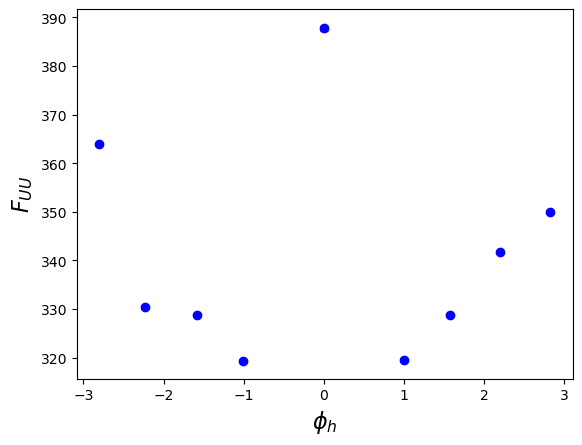

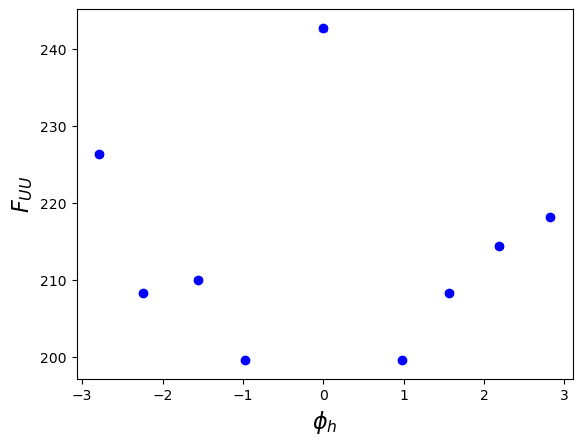

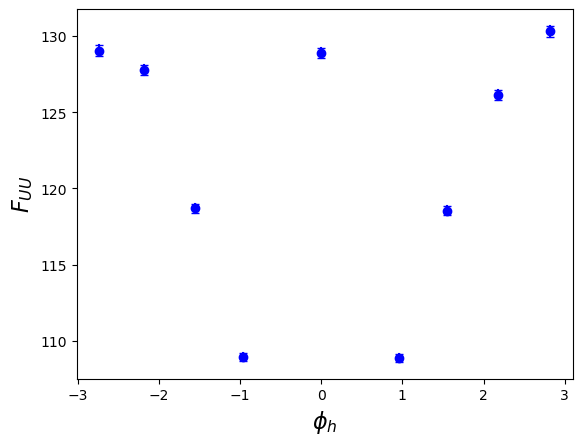

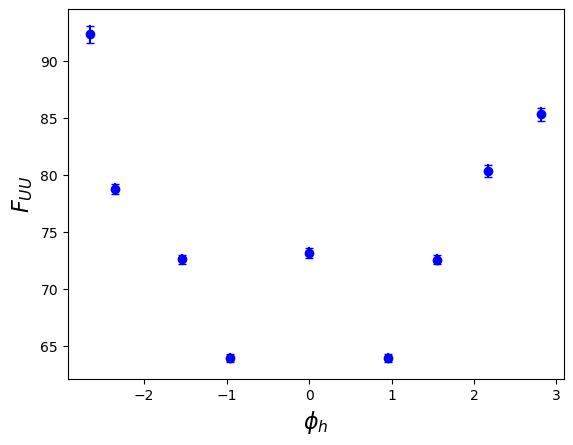

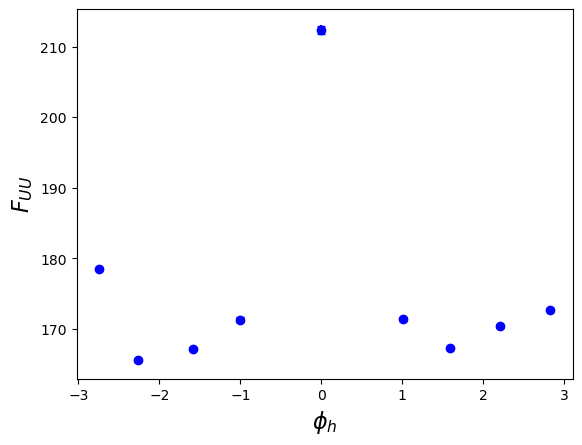

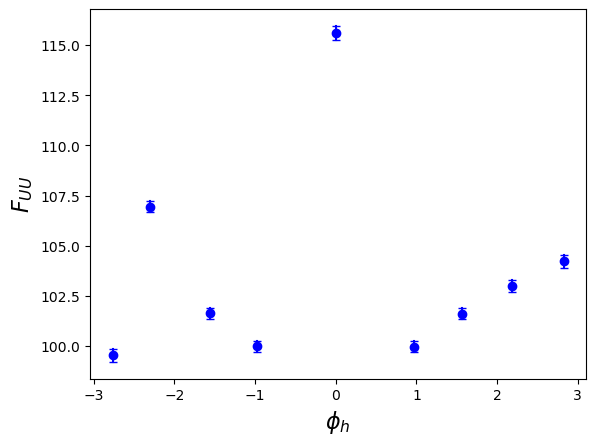

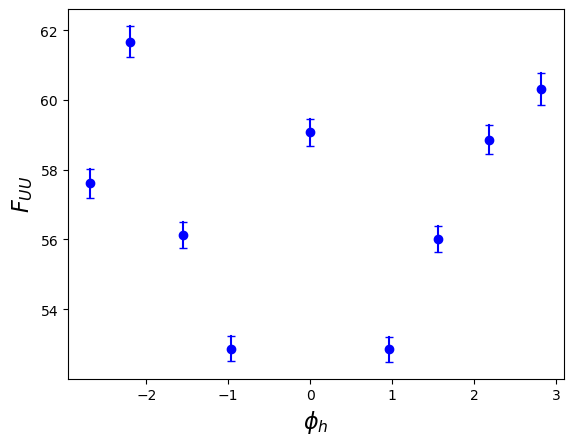

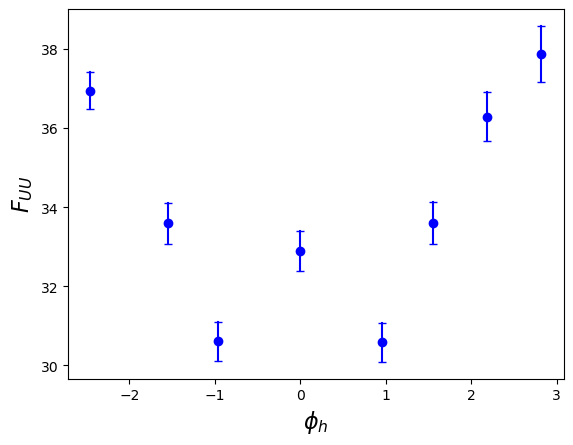

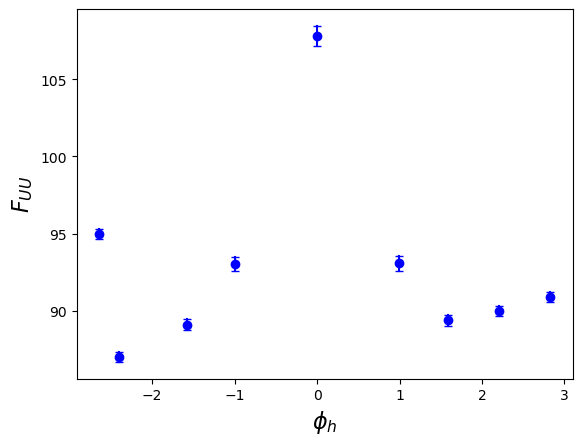

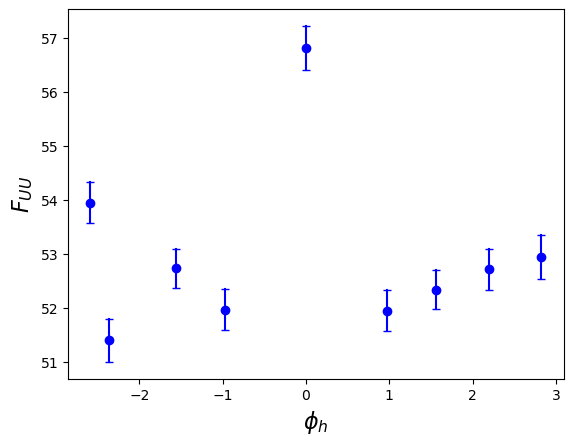

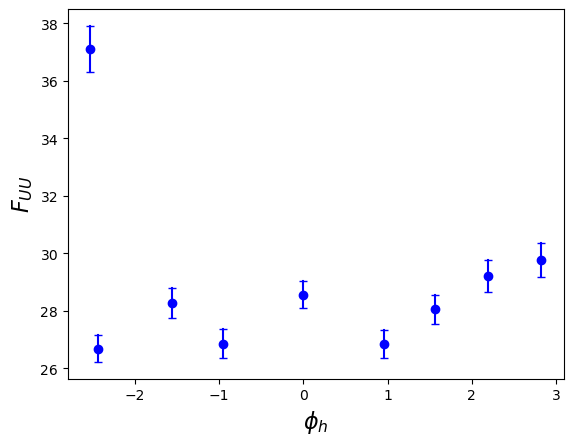

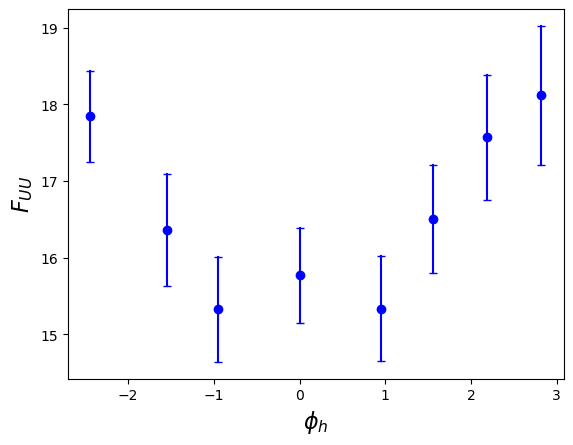

In [8]:
rows = len(z_cuts)-1
cols = len(Q2_cuts)-1
row_phi = len(phih_bins)-1

phihs_kT4 ={}# [[[0]*rows]*cols]*row_phi
Fuus_kT4 = {}#[[[0]*rows]*cols]*row_phi
Fuus_err_kT4 = {}#[[[0]*rows]*cols]*row_phi

for i_z in range(1,len(z_cuts)):
    for i_Q2 in range(1,len(Q2_cuts)):
        df_xs_kT4=df_xs_kT4_zQ2[(df_xs_kT4_zQ2['z']>z_cuts[i_z-1])&(df_xs_kT4_zQ2['z']<z_cuts[i_z])&(df_xs_kT4_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_xs_kT4_zQ2['Q2']<Q2_cuts[i_Q2])]
        df_xs_kT4=df_xs_kT4_zQ2[(df_xs_kT4_zQ2['z']>z_cuts[i_z-1])&(df_xs_kT4_zQ2['z']<z_cuts[i_z])&(df_xs_kT4_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_xs_kT4_zQ2['Q2']<Q2_cuts[i_Q2])]
        fig = plt.figure()
        ax = fig.add_subplot()
        phih_kT4 = df_xs_kT4['phih'].to_list()
        Fuu_kT4 = df_xs_kT4['value'].to_list()
        phih_kT4 = df_xs_kT4['phih'].to_list()
        Fuu_kT4 = df_xs_kT4['value'].to_list()
        print(len(phih_kT4),len(phih_kT4))
        phih_kT4=[]
        Fuu_kT4=[]
        Fuu_kT4_stat=[]
        Fuu_kT4_sys=[]
        i_phi_left = phih_bins[0]
        i_phi_count = 0
        for i_phi in phih_bins[1:]:
            print(i_phi_left,i_phi)
            phih_kT4s = df_xs_kT4[(df_xs_kT4['phih']>=i_phi_left)&(df_xs_kT4['phih']<i_phi)]['phih'].tolist()
            Fuu_kT4s = df_xs_kT4[(df_xs_kT4['phih']>=i_phi_left)&(df_xs_kT4['phih']<i_phi)]['value'].tolist()
            Fuu_kT4_stats = df_xs_kT4[(df_xs_kT4['phih']>=i_phi_left)&(df_xs_kT4['phih']<i_phi)]['stat'].tolist()
            print(len(phih_kT4s))
    
            if len(phih_kT4s)>0:  
                #print('phih',phih_kT4s)
                #print('Fuu',Fuu_kT4s)
                #print('Fuu_stat',Fuu_kT4_stats)
                _Fuu_kT4 = Get_weighted_average(Fuu_kT4s,Fuu_kT4_stats)[0]
                _Fuu_kT4_stat = Get_weighted_average(Fuu_kT4s,Fuu_kT4_stats)[1]
                _phih_kT4= Get_weighted_average_phi(phih_kT4s,Fuu_kT4_stats)[0]
                #print('_Fuu_kT4',_Fuu_kT4)
                #print('_phih',_phih_kT4)
                #print('_Fuu_stat',_Fuu_kT4_stat)
                Fuu_kT4.append(_Fuu_kT4)
                phih_kT4.append(_phih_kT4)
                Fuu_kT4_stat.append(_Fuu_kT4_stat)
                Fuu_kT4_sys.append(0.05*_Fuu_kT4)
                phihs_kT4[i_z-1,i_Q2-1,i_phi_count]=(_phih_kT4)
                Fuus_kT4[i_z-1,i_Q2-1,i_phi_count]=(_Fuu_kT4)
                Fuus_err_kT4[i_z-1,i_Q2-1,i_phi_count]=(_Fuu_kT4_stat)
                i_phi_count+=1
                #print(Fuu_kT4,phih_kT4)
                ax.plot([_phih_kT4,_phih_kT4],[_Fuu_kT4-_Fuu_kT4_stat,_Fuu_kT4+_Fuu_kT4_stat],color='blue',marker='_')
            i_phi_left = i_phi
        plt.plot(phih_kT4,Fuu_kT4,'bo')
        plt.xlabel('$\phi_h$',fontsize=16)
        plt.ylabel('$F_{UU}$',fontsize=16)
pprint.pprint(phihs_kT4)        

354 354
-3.141592653589793 -2.5132741228718345
33
-2.5132741228718345 -1.8849555921538759
34
-1.8849555921538759 -1.2566370614359172
40
-1.2566370614359172 -0.6283185307179586
36
-0.6283185307179586 0.6283185307179586
51
0.6283185307179586 1.2566370614359172
36
1.2566370614359172 1.8849555921538759
41
1.8849555921538759 2.5132741228718345
41
2.5132741228718345 3.141592653589793
42
327 327
-3.141592653589793 -2.5132741228718345
17
-2.5132741228718345 -1.8849555921538759
27
-1.8849555921538759 -1.2566370614359172
39
-1.2566370614359172 -0.6283185307179586
38
-0.6283185307179586 0.6283185307179586
56
0.6283185307179586 1.2566370614359172
38
1.2566370614359172 1.8849555921538759
41
1.8849555921538759 2.5132741228718345
37
2.5132741228718345 3.141592653589793
34
302 302
-3.141592653589793 -2.5132741228718345
14
-2.5132741228718345 -1.8849555921538759
17
-1.8849555921538759 -1.2566370614359172
35
-1.2566370614359172 -0.6283185307179586
38
-0.6283185307179586 0.6283185307179586
58
0.628318530

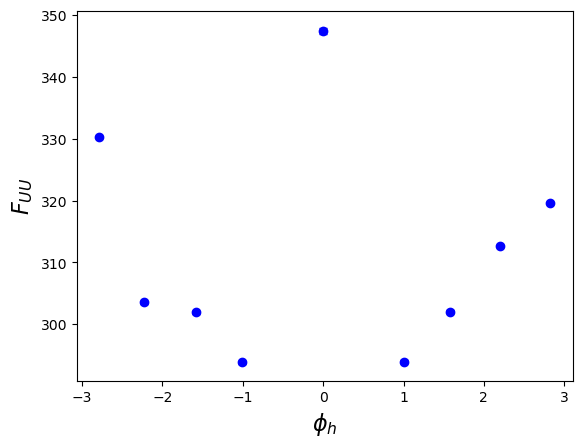

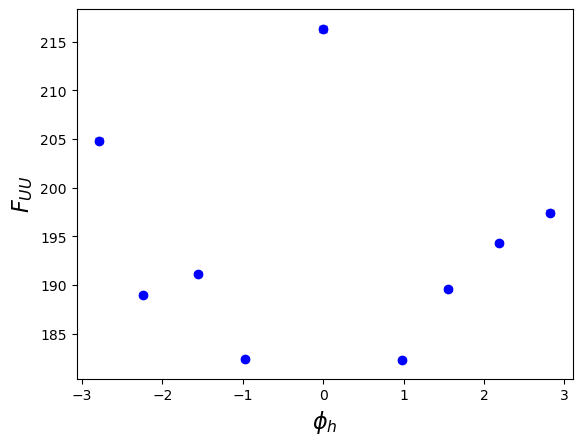

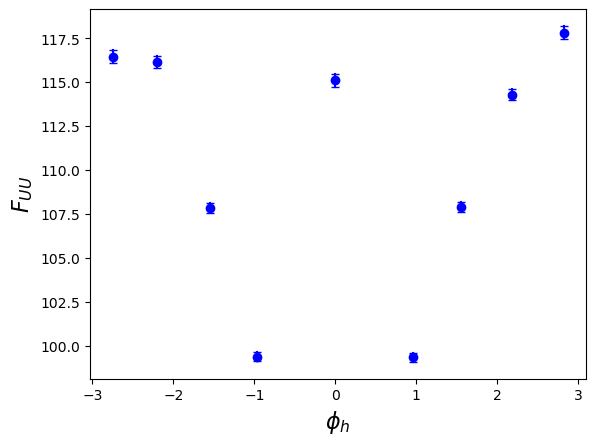

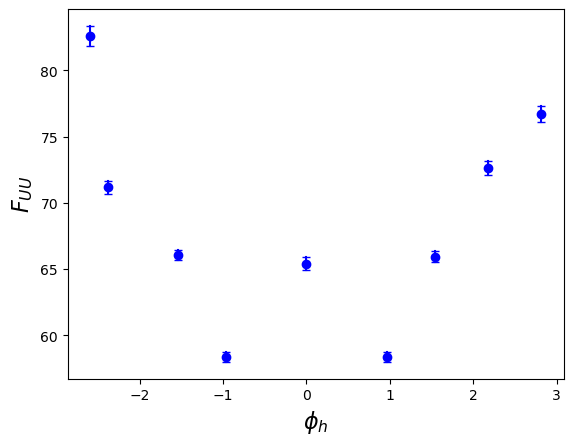

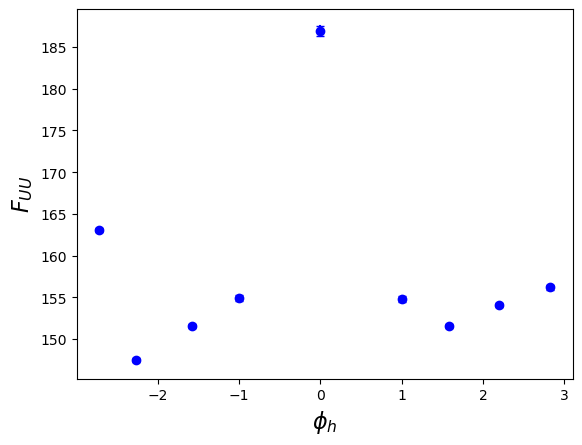

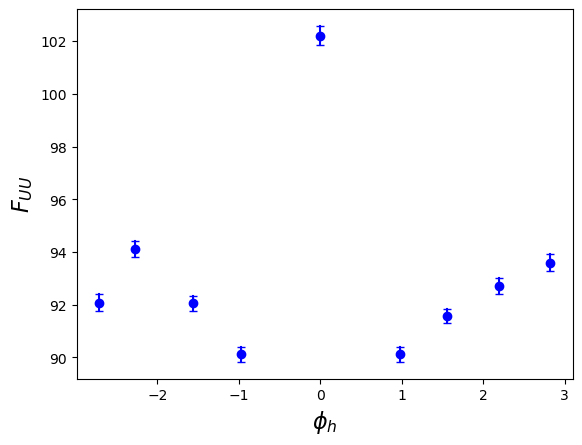

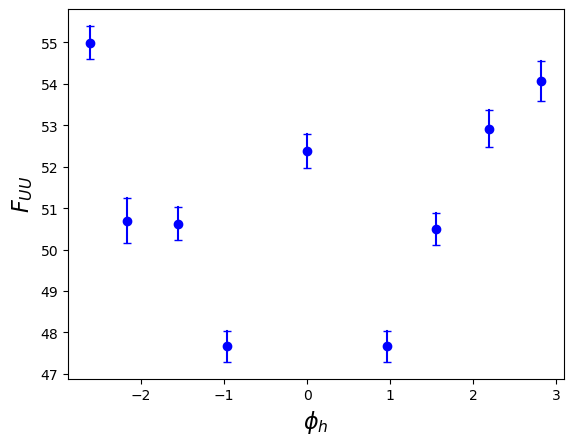

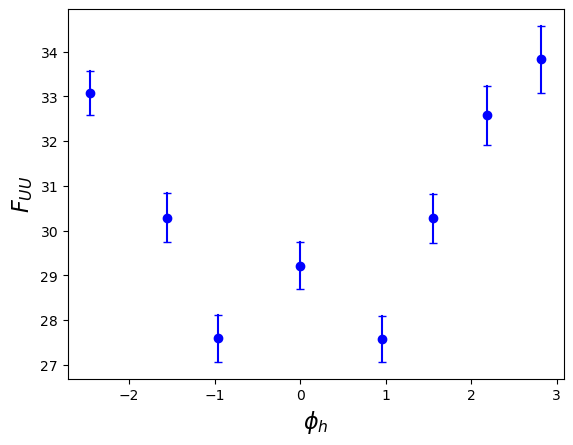

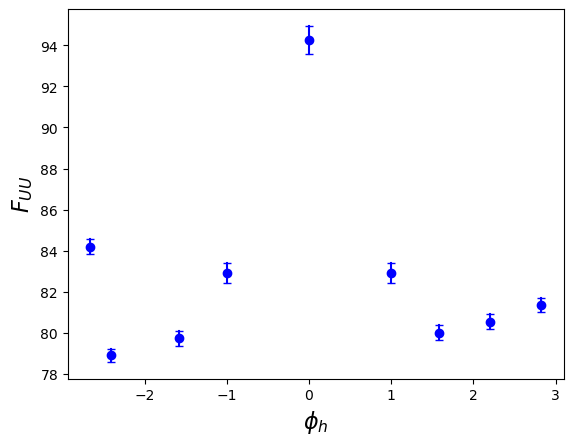

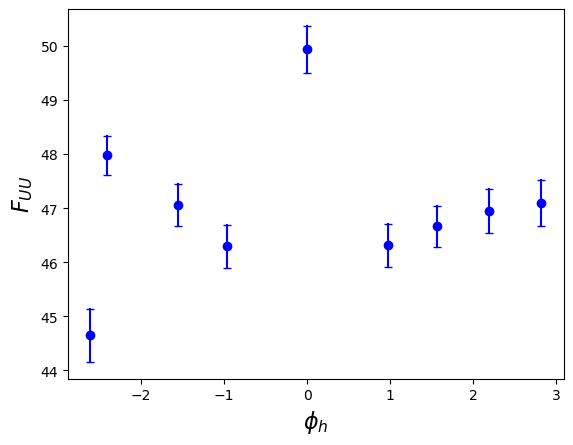

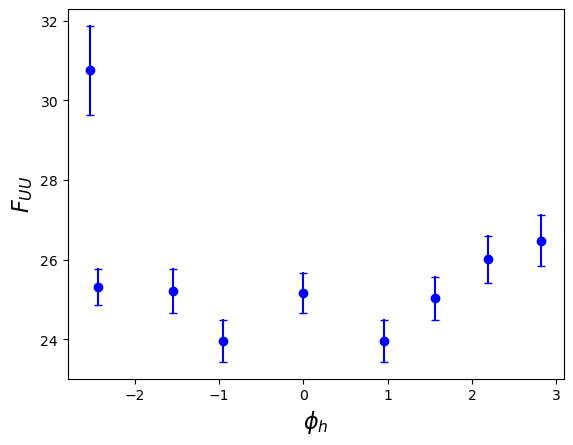

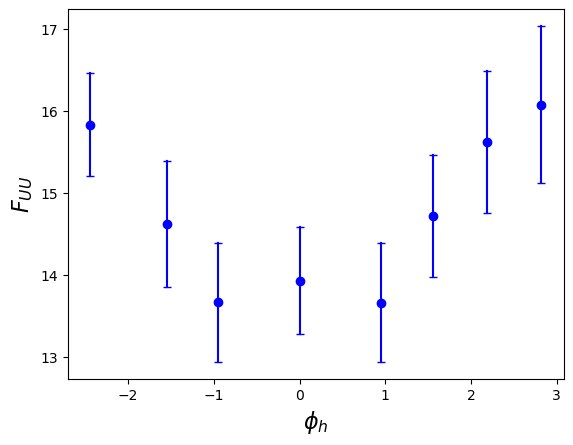

In [9]:
rows = len(z_cuts)-1
cols = len(Q2_cuts)-1
row_phi = len(phih_bins)-1

phihs_kT6 ={}# [[[0]*rows]*cols]*row_phi
Fuus_kT6 = {}#[[[0]*rows]*cols]*row_phi
Fuus_err_kT6 = {}#[[[0]*rows]*cols]*row_phi

for i_z in range(1,len(z_cuts)):
    for i_Q2 in range(1,len(Q2_cuts)):
        df_xs_kT6=df_xs_kT6_zQ2[(df_xs_kT6_zQ2['z']>z_cuts[i_z-1])&(df_xs_kT6_zQ2['z']<z_cuts[i_z])&(df_xs_kT6_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_xs_kT6_zQ2['Q2']<Q2_cuts[i_Q2])]
        df_xs_kT6=df_xs_kT6_zQ2[(df_xs_kT6_zQ2['z']>z_cuts[i_z-1])&(df_xs_kT6_zQ2['z']<z_cuts[i_z])&(df_xs_kT6_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_xs_kT6_zQ2['Q2']<Q2_cuts[i_Q2])]
        fig = plt.figure()
        ax = fig.add_subplot()
        phih_kT6 = df_xs_kT6['phih'].to_list()
        Fuu_kT6 = df_xs_kT6['value'].to_list()
        phih_kT6 = df_xs_kT6['phih'].to_list()
        Fuu_kT6 = df_xs_kT6['value'].to_list()
        print(len(phih_kT6),len(phih_kT6))
        phih_kT6=[]
        Fuu_kT6=[]
        Fuu_kT6_stat=[]
        Fuu_kT6_sys=[]
        i_phi_left = phih_bins[0]
        i_phi_count = 0
        for i_phi in phih_bins[1:]:
            print(i_phi_left,i_phi)
            phih_kT6s = df_xs_kT6[(df_xs_kT6['phih']>=i_phi_left)&(df_xs_kT6['phih']<i_phi)]['phih'].tolist()
            Fuu_kT6s = df_xs_kT6[(df_xs_kT6['phih']>=i_phi_left)&(df_xs_kT6['phih']<i_phi)]['value'].tolist()
            Fuu_kT6_stats = df_xs_kT6[(df_xs_kT6['phih']>=i_phi_left)&(df_xs_kT6['phih']<i_phi)]['stat'].tolist()
            print(len(phih_kT6s))
    
            if len(phih_kT6s)>0:  
                #print('phih',phih_kT6s)
                #print('Fuu',Fuu_kT6s)
                #print('Fuu_stat',Fuu_kT6_stats)
                _Fuu_kT6 = Get_weighted_average(Fuu_kT6s,Fuu_kT6_stats)[0]
                _Fuu_kT6_stat = Get_weighted_average(Fuu_kT6s,Fuu_kT6_stats)[1]
                _phih_kT6= Get_weighted_average_phi(phih_kT6s,Fuu_kT6_stats)[0]
                #print('_Fuu_kT6',_Fuu_kT6)
                #print('_phih',_phih_kT6)
                #print('_Fuu_stat',_Fuu_kT6_stat)
                Fuu_kT6.append(_Fuu_kT6)
                phih_kT6.append(_phih_kT6)
                Fuu_kT6_stat.append(_Fuu_kT6_stat)
                Fuu_kT6_sys.append(0.05*_Fuu_kT6)
                phihs_kT6[i_z-1,i_Q2-1,i_phi_count]=(_phih_kT6)
                Fuus_kT6[i_z-1,i_Q2-1,i_phi_count]=(_Fuu_kT6)
                Fuus_err_kT6[i_z-1,i_Q2-1,i_phi_count]=(_Fuu_kT6_stat)
                i_phi_count+=1
                #print(Fuu_kT6,phih_kT6)
                ax.plot([_phih_kT6,_phih_kT6],[_Fuu_kT6-_Fuu_kT6_stat,_Fuu_kT6+_Fuu_kT6_stat],color='blue',marker='_')
            i_phi_left = i_phi
        plt.plot(phih_kT6,Fuu_kT6,'bo')
        plt.xlabel('$\phi_h$',fontsize=16)
        plt.ylabel('$F_{UU}$',fontsize=16)
pprint.pprint(phihs_kT6)        

no data here i_z,i_Q2,i_phi 2 4 8
no data here i_z,i_Q2,i_phi 3 4 8


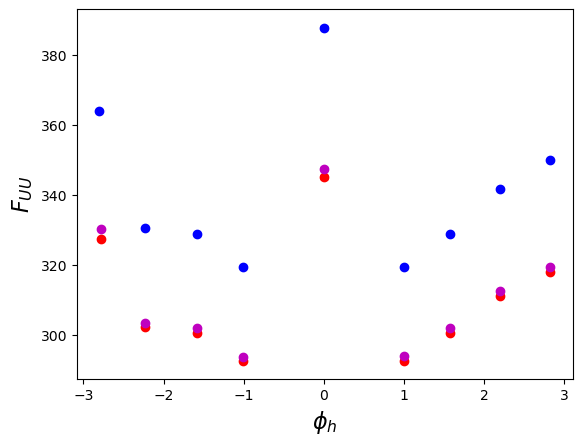

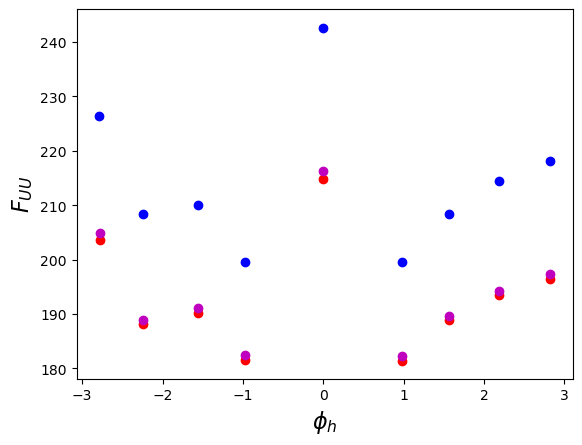

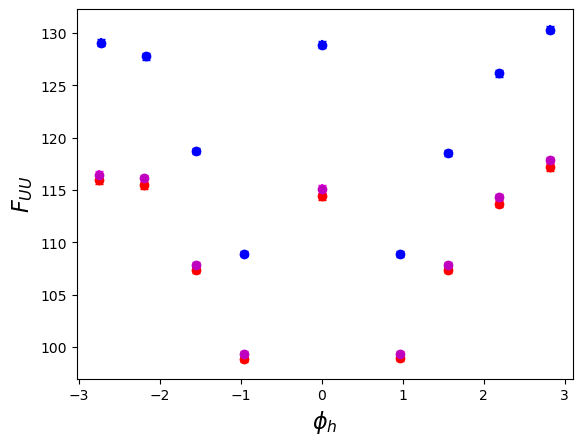

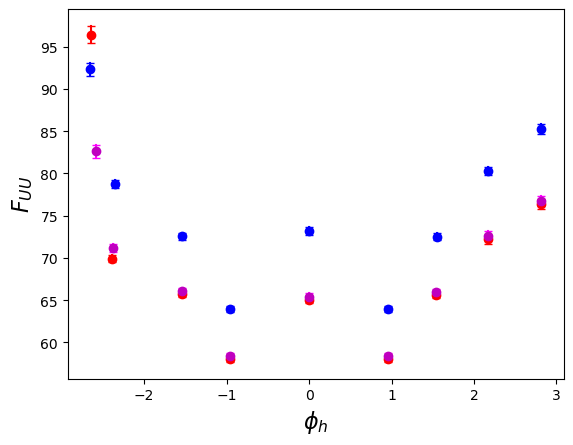

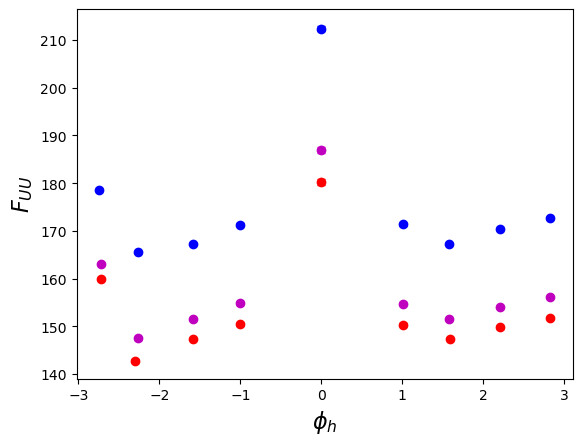

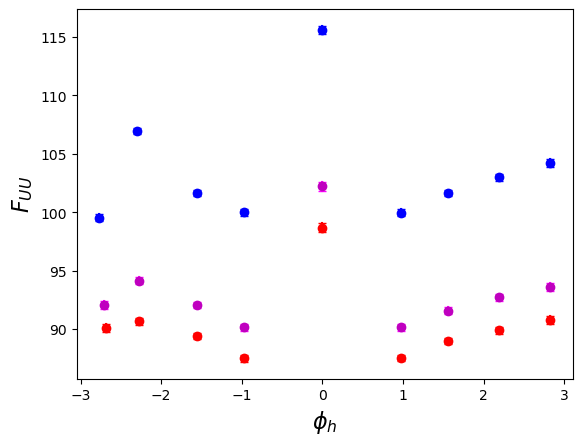

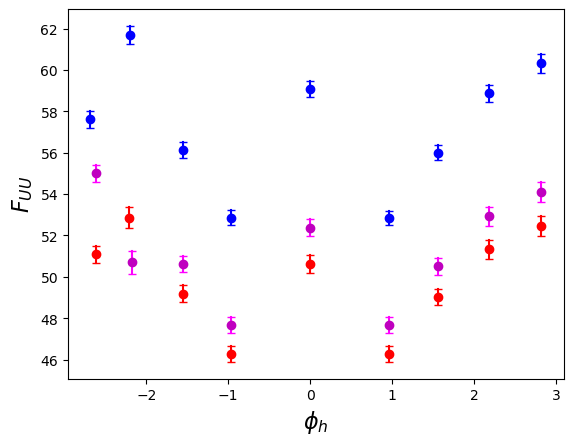

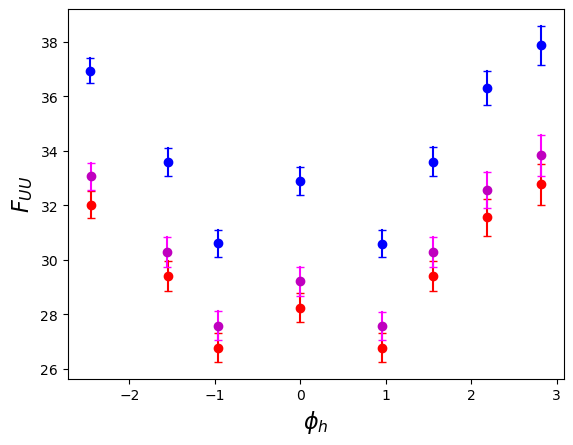

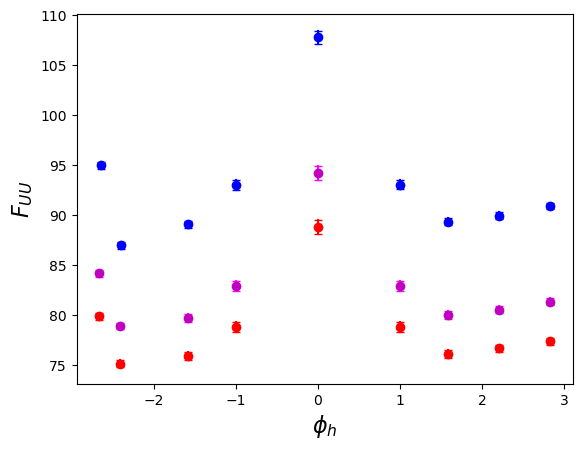

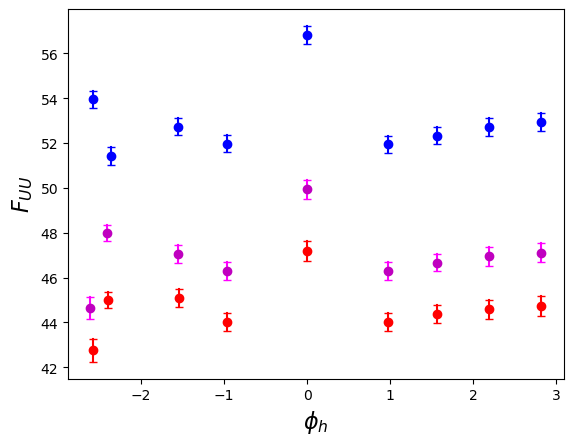

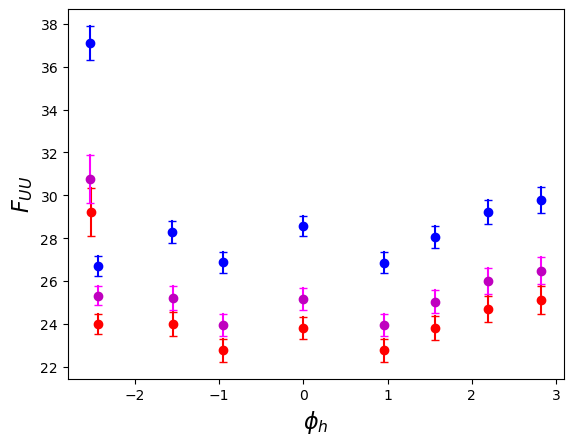

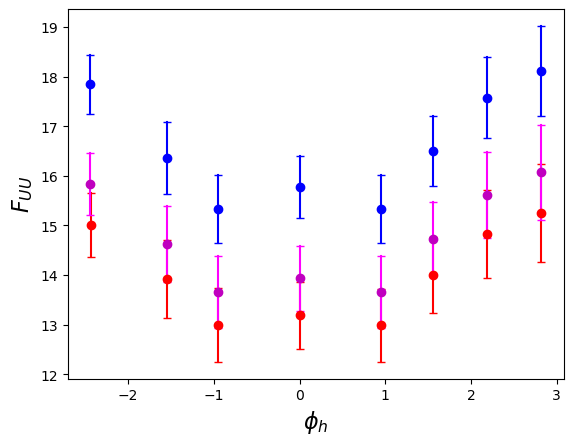

In [10]:
for i_z in range(1,len(z_cuts)):
    for i_Q2 in range(1,len(Q2_cuts)):
        fig = plt.figure()
        ax = fig.add_subplot()
        for i_phi in range(0,len(phih_bins)-1):
            
            try:
                
                Fuu_kT8 = Fuus_kT8[i_z-1,i_Q2-1,i_phi]
                Fuu_err_kT8 = Fuus_err_kT8[i_z-1,i_Q2-1,i_phi]
                Fuu_kT4 = Fuus_kT4[i_z-1,i_Q2-1,i_phi]
                Fuu_err_kT4 = Fuus_err_kT4[i_z-1,i_Q2-1,i_phi]
                Fuu_kT6 = Fuus_kT6[i_z-1,i_Q2-1,i_phi]
                Fuu_err_kT6 = Fuus_err_kT6[i_z-1,i_Q2-1,i_phi]
                #print(phihs_kT4[i_z-1,i_Q2-1,i_phi])
                ax.plot([phihs_kT8[i_z-1,i_Q2-1,i_phi],phihs_kT8[i_z-1,i_Q2-1,i_phi]],[Fuu_kT8-Fuu_err_kT8,Fuu_kT8+Fuu_err_kT8],color='red',marker='_')
                ax.plot([phihs_kT4[i_z-1,i_Q2-1,i_phi],phihs_kT4[i_z-1,i_Q2-1,i_phi]],[Fuu_kT4-Fuu_err_kT4,Fuu_kT4+Fuu_err_kT4],color='blue',marker='_')
                ax.plot([phihs_kT6[i_z-1,i_Q2-1,i_phi],phihs_kT6[i_z-1,i_Q2-1,i_phi]],[Fuu_kT6-Fuu_err_kT6,Fuu_kT6+Fuu_err_kT6],color='magenta',marker='_')
                plt.plot(phihs_kT8[i_z-1,i_Q2-1,i_phi],Fuus_kT8[i_z-1,i_Q2-1,i_phi],'ro',label='kT=0.804')
                plt.plot(phihs_kT4[i_z-1,i_Q2-1,i_phi],Fuus_kT4[i_z-1,i_Q2-1,i_phi],'bo',label='kT=0.404')
                plt.plot(phihs_kT6[i_z-1,i_Q2-1,i_phi],Fuus_kT6[i_z-1,i_Q2-1,i_phi],'mo',label='kT=0.604')
            except KeyError:
                print('no data here i_z,i_Q2,i_phi',i_z,i_Q2,i_phi)
        plt.xlabel('$\phi_h$',fontsize=16)
        plt.ylabel('$F_{UU}$',fontsize=16)


no data here i_z,i_Q2,i_phi 2 4 8
no data here i_z,i_Q2,i_phi 3 4 8


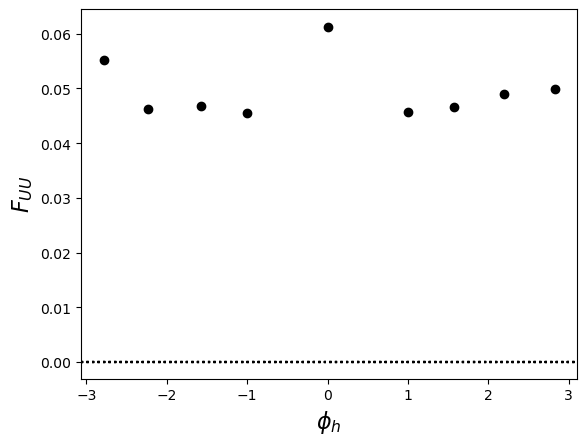

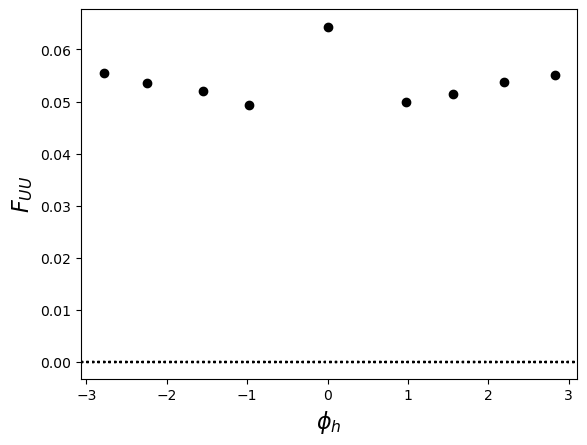

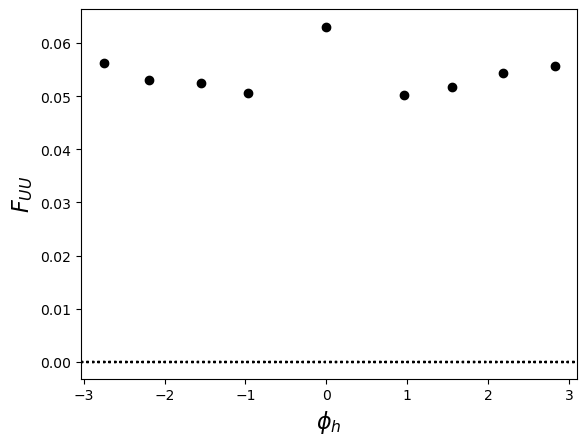

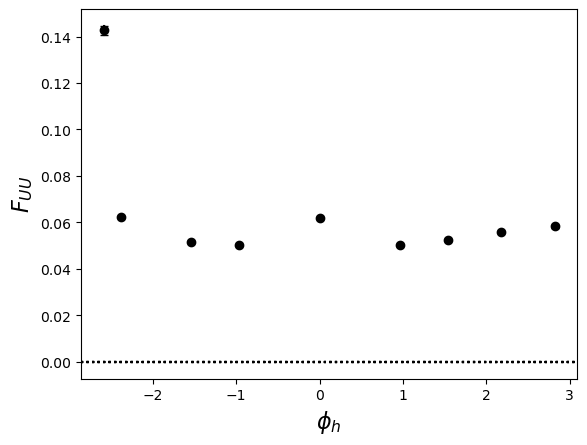

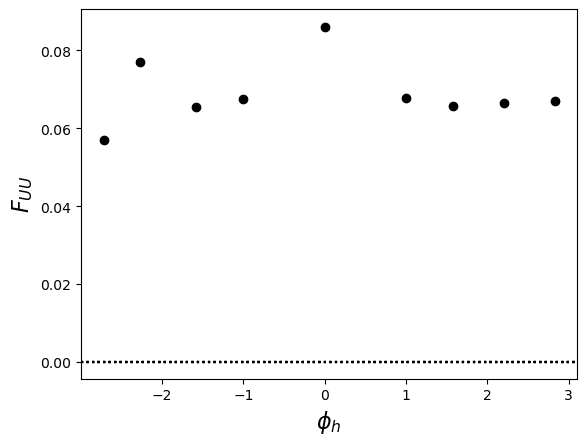

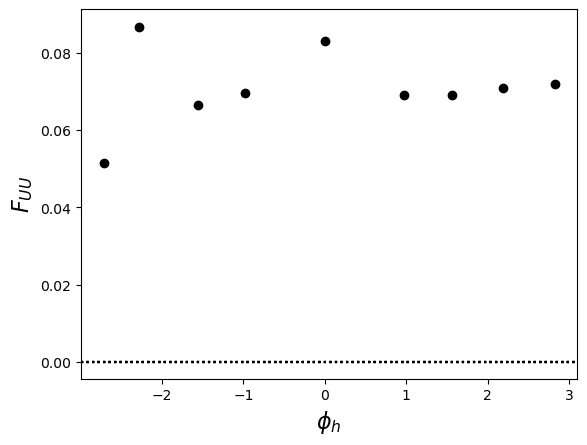

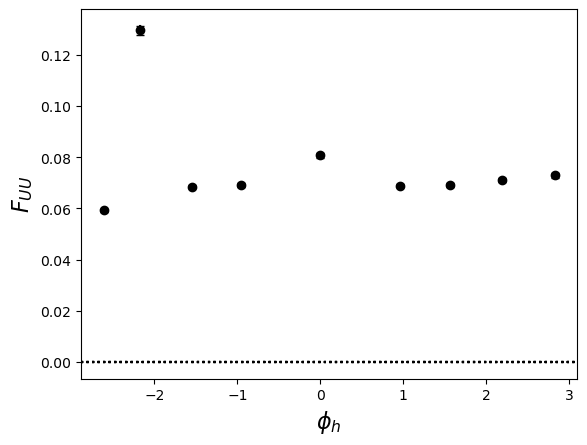

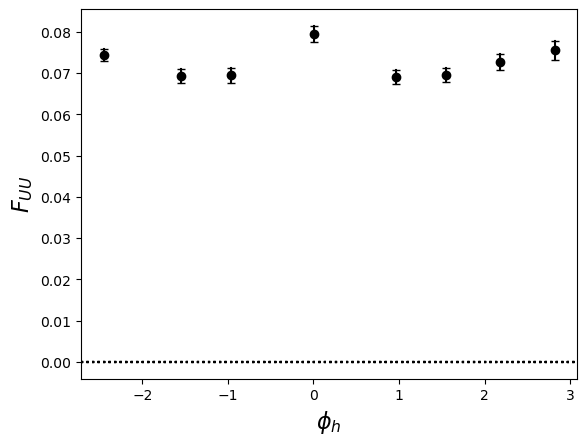

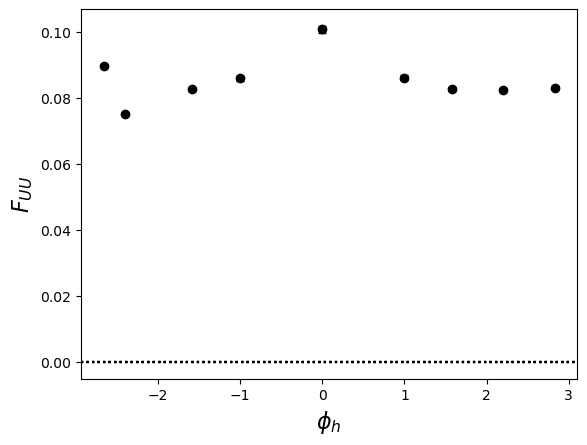

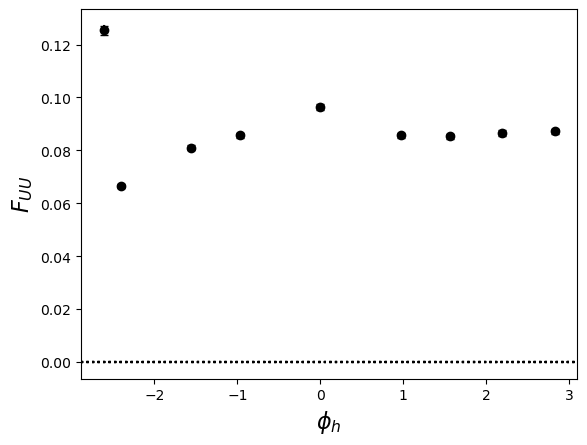

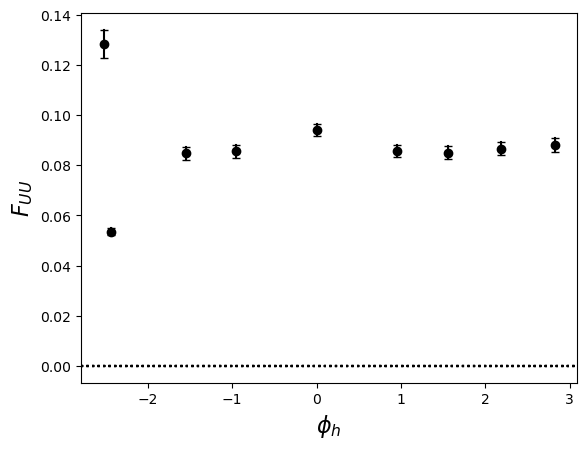

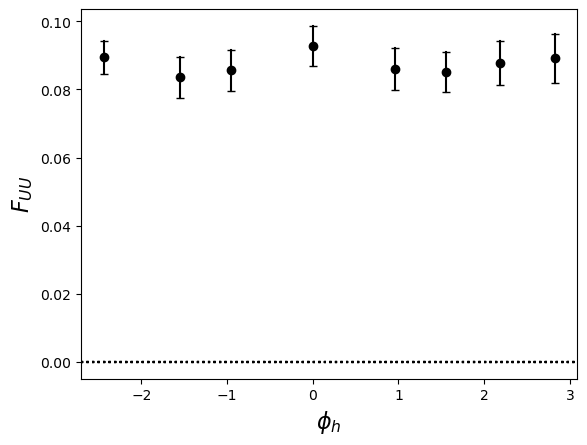

In [11]:
for i_z in range(1,len(z_cuts)):
    for i_Q2 in range(1,len(Q2_cuts)):
        fig = plt.figure()
        ax = fig.add_subplot()
        for i_phi in range(0,len(phih_bins)-1):
            
            try:
                
                phih = phihs_kT6[i_z-1,i_Q2-1,i_phi]
                Fuu_kT8 = Fuus_kT8[i_z-1,i_Q2-1,i_phi]
                Fuu_err_kT8 = Fuus_err_kT8[i_z-1,i_Q2-1,i_phi]
                Fuu_kT4 = Fuus_kT4[i_z-1,i_Q2-1,i_phi]
                Fuu_err_kT4 = Fuus_err_kT4[i_z-1,i_Q2-1,i_phi]
                Fuu_kT6 = Fuus_kT6[i_z-1,i_Q2-1,i_phi]
                Fuu_err_kT6 = Fuus_err_kT6[i_z-1,i_Q2-1,i_phi]
                _Fuu_ratio,_Fuu_ratio_err = Get_ratio_error(Fuu_kT8,Fuu_err_kT8,Fuu_kT6,Fuu_err_kT6)
                _Fuu_ratio2,_Fuu_ratio2_err = Get_ratio_error(Fuu_kT4,Fuu_err_kT4,Fuu_kT6,Fuu_err_kT6)
                Fuu_ratio = (_Fuu_ratio+_Fuu_ratio2)/2
                Fuu_ratio_err = (_Fuu_ratio_err+_Fuu_ratio2_err)/2
                
                ax.plot([phih,phih],[Fuu_ratio-Fuu_ratio_err,Fuu_ratio+Fuu_ratio_err],color='black',marker='_')
                plt.plot(phih,Fuu_ratio,'ko')
                plt.axhline(0,color = 'black',linestyle = ':')
                #plt.plot(phihs_kT4[i_z-1,i_Q2-1,i_phi],Fuus_kT4[i_z-1,i_Q2-1,i_phi],'bo',label='kT=0.404')
            except KeyError:
                print('no data here i_z,i_Q2,i_phi',i_z,i_Q2,i_phi)
        plt.xlabel('$\phi_h$',fontsize=16)
        plt.ylabel('$F_{UU}$',fontsize=16)


no data here i_z,i_Q2,i_phi 2 4 8
no data here i_z,i_Q2,i_phi 3 4 8


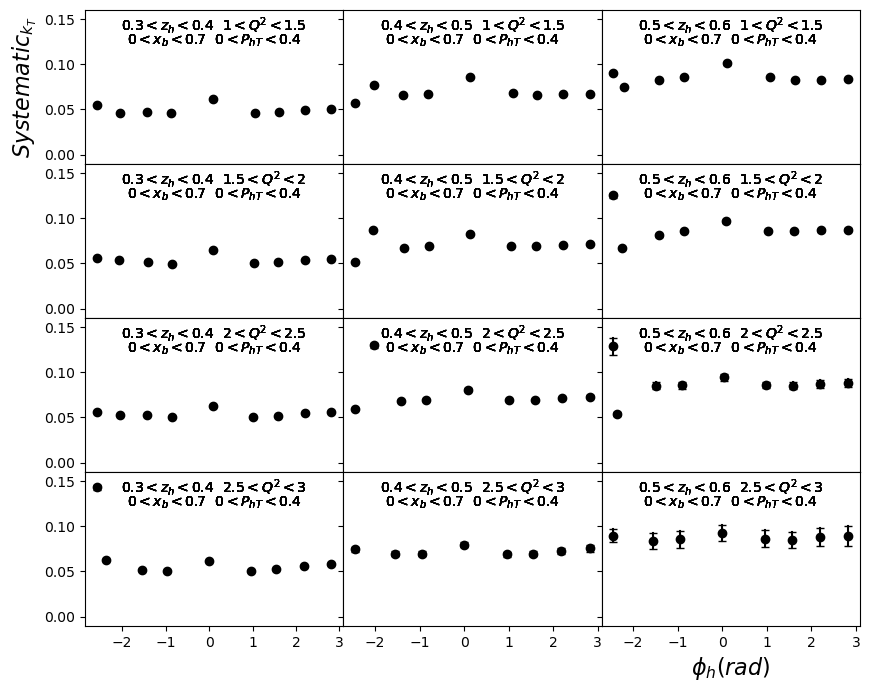

In [12]:
fig, axs = plt.subplots(4,3,figsize=(10,8),sharey=True)
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
#plt.ylabel('Ratio',fontsize=16)
plt.xlabel('$\phi_h(rad)$',fontsize=16)

for i_z in range(1,len(z_cuts)):
    for i_Q2 in range(1,len(Q2_cuts)):

        for i_phi in range(0,len(phih_bins)-1):
            
            try:
                #print(phihs_kT4[i_z-1,i_Q2-1,i_phi])
                phih = phihs_kT6[i_z-1,i_Q2-1,i_phi]
                Fuu_kT8 = Fuus_kT8[i_z-1,i_Q2-1,i_phi]
                Fuu_err_kT8 = Fuus_err_kT8[i_z-1,i_Q2-1,i_phi]
                Fuu_kT4 = Fuus_kT4[i_z-1,i_Q2-1,i_phi]
                Fuu_err_kT4 = Fuus_err_kT4[i_z-1,i_Q2-1,i_phi]
                Fuu_kT6 = Fuus_kT6[i_z-1,i_Q2-1,i_phi]
                Fuu_err_kT6 = Fuus_err_kT6[i_z-1,i_Q2-1,i_phi]
                _Fuu_ratio,_Fuu_ratio_err = Get_ratio_error(Fuu_kT8,Fuu_err_kT8,Fuu_kT6,Fuu_err_kT6)
                _Fuu_ratio2,_Fuu_ratio2_err = Get_ratio_error(Fuu_kT4,Fuu_err_kT4,Fuu_kT6,Fuu_err_kT6)
                Fuu_ratio = (_Fuu_ratio+_Fuu_ratio2)/2
                Fuu_ratio_err = math.sqrt(_Fuu_ratio_err**2+_Fuu_ratio2_err**2)
                axs[i_Q2-1][i_z-1].plot([phih,phih],[Fuu_ratio-Fuu_ratio_err,Fuu_ratio+Fuu_ratio_err],color='black',marker='_')
                axs[i_Q2-1][i_z-1].plot(phih,Fuu_ratio,'ko')
                #axs[i_Q2-1][i_z-1].axhline(1,color = 'black',linestyle = ':')
                axs[i_Q2-1][i_z-1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{}$'.format(z_cuts[i_z-1],z_cuts[i_z],Q2_cuts[i_Q2-1],Q2_cuts[i_Q2]), horizontalalignment='center', verticalalignment='center', transform=axs[i_Q2-1][i_z-1].transAxes)
                axs[i_Q2-1][i_z-1].text(0.5,0.8,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[i_Q2-1][i_z-1].transAxes)
            except KeyError:
                print('no data here i_z,i_Q2,i_phi',i_z,i_Q2,i_phi)
                

        #axs[i_Q2-1][i_z-1].set_xlabel('$\phi_h$',fontsize=16)
        #axs[i_Q2-1][i_z-1].set_ylabel('$F_{UU}$',fontsize=16)
        #axs[i_Q2-1][i_z-1].set_ylim(0.7,1.3)
        #axs[i_Q2-1][i_z-1].set_ylim(0.85,1.15)
        axs[i_Q2-1][i_z-1].set_ylim(-0.01,0.16)
axs[0][0].set_ylabel('$Systematic_{k_T}$',fontsize=16)
plt.savefig('../Unpol_proposal/Materials/results_sys/Systemaic_from_kT.pdf')